In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
day = pd.read_csv("day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
day.shape

(730, 16)

In [4]:
day.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

# Data Inspecting


In [5]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
day.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [8]:
day['seasons'] = day['season'].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

In [9]:
day.seasons.value_counts()

seasons
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [10]:
seasons = pd.get_dummies(day["seasons"],drop_first=True)

In [11]:
seasons=seasons.astype("int")

In [12]:
seasons

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [13]:
# merging dataframe
day = pd.concat([day,seasons],axis=1)

In [14]:
day.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,seasons,spring,summer,winter
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,spring,1,0,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,spring,1,0,0
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,spring,1,0,0


In [15]:
day.drop(columns=['season','seasons'],inplace=True)

In [16]:
day.columns

Index(['instant', 'dteday', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'spring', 'summer', 'winter'],
      dtype='object')

In [17]:
# dropping the date column
day.drop(columns = ['dteday'],inplace=True)

In [18]:
day.columns

Index(['instant', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'spring', 'summer', 'winter'],
      dtype='object')

In [19]:
day.columns

Index(['instant', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'spring', 'summer', 'winter'],
      dtype='object')

In [20]:
day.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [21]:
#1: Clear, Few clouds, Partly cloudy, Partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


In [22]:
day['weathersit'] = day['weathersit'].map({1:'Clear, Few clouds, Partly cloudy, Partly cloudy',2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'})

In [23]:
day.weathersit.value_counts()

weathersit
Clear, Few clouds, Partly cloudy, Partly cloudy                                            463
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               246
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds     21
Name: count, dtype: int64

In [24]:
weathers = pd.get_dummies(day['weathersit'],drop_first=True)

In [25]:
weathers

,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,False,True
1,False,True
2,False,False
3,False,False
4,False,False
...,...,...
725,False,True
726,False,True
727,False,True
728,False,False


In [26]:
weathers = weathers.astype('int')

In [27]:
weathers

,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
725,0,1
726,0,1
727,0,1
728,0,0


In [28]:
day = pd.concat([day,weathers],axis=1)

In [29]:
day

,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,1,0,1,0,6,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,1
1,2,0,1,0,0,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,1
2,3,0,1,0,1,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0
3,4,0,1,0,2,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0
4,5,0,1,0,3,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,1,12,0,4,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",10.420847,11.33210,65.2917,23.458911,247,1867,2114,1,0,0,0,1
726,727,1,12,0,5,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",10.386653,12.75230,59.0000,10.416557,644,2451,3095,1,0,0,0,1
727,728,1,12,0,6,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",10.386653,12.12000,75.2917,8.333661,159,1182,1341,1,0,0,0,1
728,729,1,12,0,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",10.489153,11.58500,48.3333,23.500518,364,1432,1796,1,0,0,0,0


In [30]:
day.drop(columns='weathersit',inplace=True)

In [31]:
day.head(3)

,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,1
1,2,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,1
2,3,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0


In [32]:
day.drop(columns = ['instant'],inplace=True)

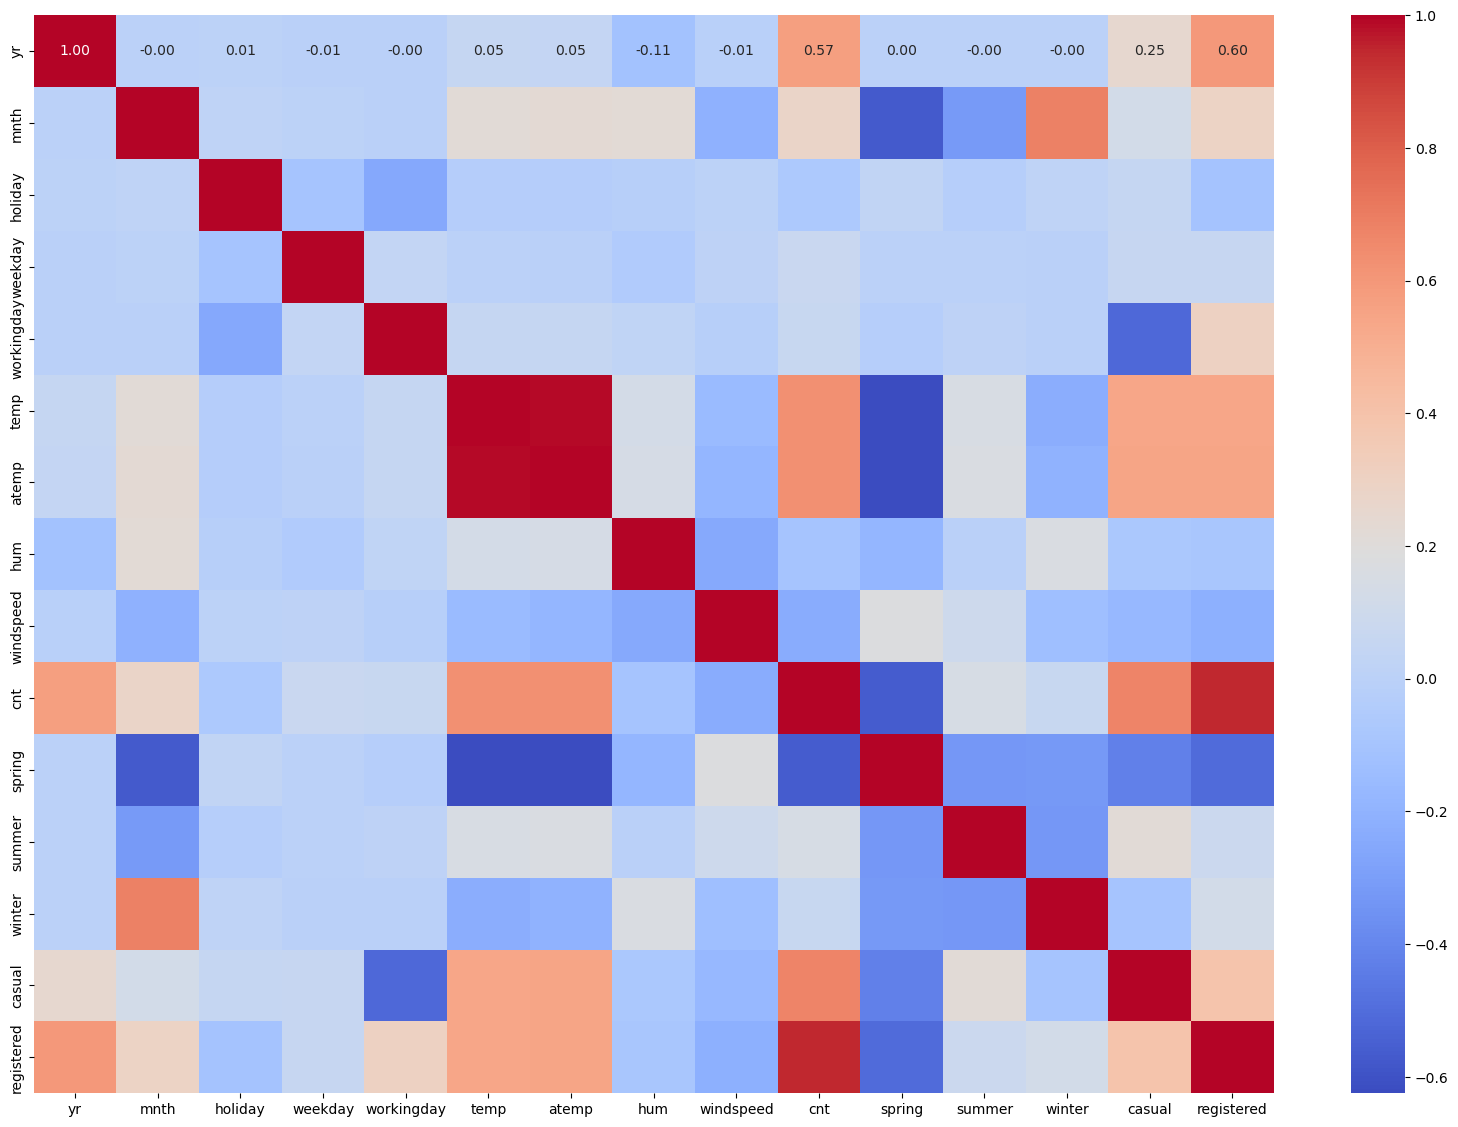

In [33]:

plt.figure(figsize=(20, 14))
sns.heatmap(
    day[['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'spring', 'summer', 'winter','casual','registered']].corr(),
    annot=True,  # To display the correlation values
    fmt=".2f",  # Format for annotation values
    cmap="coolwarm",  # Adjust the color map for better visibility
)
plt.show()

In [34]:
day.drop(columns=['casual','registered'],inplace=True)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
day_train , day_test = train_test_split(day,train_size=0.6,random_state=90)

In [37]:
day_train.shape

(438, 15)

In [38]:
day_train.head(3)

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
396,1,2,0,3,1,19.235847,23.32690,50.7917,12.667489,4579,1,0,0,0,0
661,1,10,0,3,1,24.087500,27.93605,63.6250,4.876206,7693,0,0,1,0,0
169,0,6,0,0,0,28.665847,32.29230,66.6667,6.834000,4744,0,1,0,0,1


In [39]:
day_test.shape

(292, 15)

In [40]:
day_test

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
702,1,12,0,2,1,19.509153,23.45270,73.3750,11.666643,6606,0,0,1,0,0
201,0,7,0,4,1,33.415000,41.31855,69.1250,14.875407,3784,0,0,0,0,1
473,1,4,0,4,1,20.431653,24.65230,61.2500,4.417256,6565,0,1,0,0,0
294,0,10,0,6,0,17.322500,21.27460,62.9167,6.208669,4308,0,0,1,0,0
547,1,7,0,1,1,32.048347,35.10190,44.7083,13.082889,6227,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,1,12,0,5,1,13.154153,16.09790,76.4167,8.750200,5008,0,0,1,0,1
590,1,8,0,2,1,29.793347,33.83895,68.6667,11.333586,6784,0,0,0,0,0
341,0,12,0,4,1,10.899153,12.84690,58.0000,16.083886,3322,0,0,1,0,0
617,1,9,0,1,1,23.916653,28.28270,50.3750,17.333771,7525,0,0,0,0,0


In [41]:
#3 rescaling the values
from sklearn.preprocessing import MinMaxScaler

In [42]:
num_variables = ['temp','atemp','hum','windspeed','cnt']

In [43]:
scaler = MinMaxScaler()

In [44]:
day_train[num_variables] = scaler.fit_transform(day_train[num_variables])

In [45]:
day_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
396,1,2,0,3,1,0.510926,0.508605,0.407860,0.343610,0.524275,1,0,0,0,0
661,1,10,0,3,1,0.658374,0.629607,0.571428,0.103876,0.882536,0,0,1,0,0
169,0,6,0,0,0,0.797517,0.743971,0.610197,0.164117,0.543258,0,1,0,0,1
524,1,6,0,6,0,0.812053,0.747280,0.317578,0.251294,0.860101,0,1,0,0,0
13,0,1,0,5,1,0.126773,0.143528,0.445981,0.214724,0.160953,1,0,0,0,0


In [46]:
# creating x_-train , y_-train
y_train_day = day_train.pop('cnt')
x_train_day = day_train

In [47]:
x_train_day.head(3)

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
396,1,2,0,3,1,0.510926,0.508605,0.407860,0.343610,1,0,0,0,0
661,1,10,0,3,1,0.658374,0.629607,0.571428,0.103876,0,0,1,0,0
169,0,6,0,0,0,0.797517,0.743971,0.610197,0.164117,0,1,0,0,1


In [48]:
y_train_day.head(3)


396    0.524275
661    0.882536
169    0.543258
Name: cnt, dtype: float64

In [49]:
import statsmodels.api as sm

In [50]:
x_train_day_sm = sm.add_constant(x_train_day)

In [51]:
x_train_day_sm.head(3)

,const,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
396,1.0,1,2,0,3,1,0.510926,0.508605,0.407860,0.343610,1,0,0,0,0
661,1.0,1,10,0,3,1,0.658374,0.629607,0.571428,0.103876,0,0,1,0,0
169,1.0,0,6,0,0,0,0.797517,0.743971,0.610197,0.164117,0,1,0,0,1


In [52]:
model = sm.OLS(y_train_day,x_train_day_sm)

In [53]:
model = model.fit()

In [54]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     154.4
Date:                Fri, 27 Dec 2024   Prob (F-statistic):          2.64e-156
Time:                        15:19:29   Log-Likelihood:                 424.68
No. Observations:                 438   AIC:                            -819.4
Df Residuals:                     423   BIC:                            -758.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.2998      0.041      7.397      0.000       0.220       0.379
yr                                                                                          0.2353      0.009     25.485      0.000       0.217       0.253
mnth                                                                                       -0.0055      0.002     -2.281      0.023      -0.010      -0.001
holiday                                                                                    -0.0467      0.029     -1.622      0.106      -0.103       0.010
weekday                                                                                     0.0096      0.002      4.151      0.000       0.005       0.014
workingday                                                                                  0.0058      0.010      0.578      0.564      -0.014       0.026
temp                                                                                        0.0445      0.269      0.165      0.869      -0.485       0.574
atemp                                                                                       0.4564      0.287      1.590      0.112      -0.108       1.020
hum                                                                                        -0.1322      0.037     -3.605      0.000      -0.204      -0.060
windspeed                                                                                  -0.1479      0.032     -4.626      0.000      -0.211      -0.085
spring                                                                                     -0.1336      0.025     -5.402      0.000      -0.182      -0.085
summer                                                                                     -0.0012      0.017     -0.071      0.944      -0.034       0.032
winter                                                                                      0.0899      0.019      4.747      0.000       0.053       0.127
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2156      0.030     -7.173      0.000      -0.275      -0.157
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0477      0.012     -3.829      0.000      -0.072      -0.023
==============================================================================
Omnibus:                       63.998   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.379
Skew:                          -0.743 

In [55]:
y_train_predicted = model.predict(x_train_day_sm)

In [56]:
residuals_training = y_train_day - y_train_predicted

In [57]:
residuals_training

396   -0.050835
661    0.052272
169    0.055223
524    0.003828
13    -0.033761
         ...   
679    0.107372
323    0.005591
671   -0.021206
626    0.164510
669    0.041478
Length: 438, dtype: float64

C:\Users\navya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


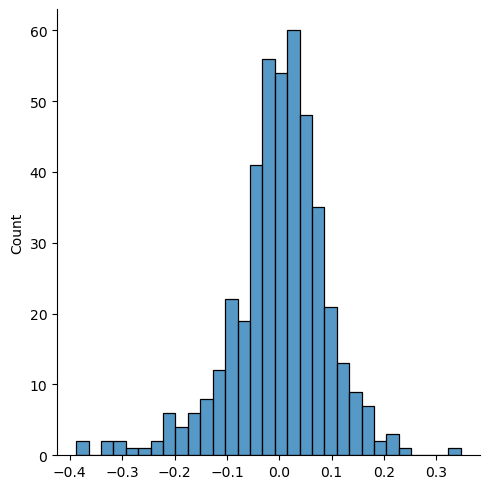

In [58]:
sns.displot(residuals_training)
plt.show()

In [59]:
x_train_day.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
396,1,2,0,3,1,0.510926,0.508605,0.407860,0.343610,1,0,0,0,0
661,1,10,0,3,1,0.658374,0.629607,0.571428,0.103876,0,0,1,0,0
169,0,6,0,0,0,0.797517,0.743971,0.610197,0.164117,0,1,0,0,1
524,1,6,0,6,0,0.812053,0.747280,0.317578,0.251294,0,1,0,0,0
13,0,1,0,5,1,0.126773,0.143528,0.445981,0.214724,1,0,0,0,0


In [60]:
day_test.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
702,1,12,0,2,1,19.509153,23.45270,73.3750,11.666643,6606,0,0,1,0,0
201,0,7,0,4,1,33.415000,41.31855,69.1250,14.875407,3784,0,0,0,0,1
473,1,4,0,4,1,20.431653,24.65230,61.2500,4.417256,6565,0,1,0,0,0
294,0,10,0,6,0,17.322500,21.27460,62.9167,6.208669,4308,0,0,1,0,0
547,1,7,0,1,1,32.048347,35.10190,44.7083,13.082889,6227,0,0,0,0,0


In [61]:
day_test[num_variables] = scaler.transform(day_test[num_variables])

In [62]:
day_test

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
702,1,12,0,2,1,0.519232,0.511907,0.695698,0.312814,0.757478,0,0,1,0,0
201,0,7,0,4,1,0.941851,0.980934,0.641529,0.411546,0.432812,0,0,0,0,1
473,1,4,0,4,1,0.547268,0.543400,0.541158,0.089755,0.752761,0,1,0,0,0
294,0,10,0,6,0,0.452776,0.454726,0.562401,0.144876,0.493097,0,0,1,0,0
547,1,7,0,1,1,0.900316,0.817730,0.330323,0.356392,0.713875,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,1,12,0,5,1,0.326094,0.318824,0.734467,0.223077,0.573631,0,0,1,0,1
590,1,8,0,2,1,0.831783,0.784574,0.635688,0.302566,0.777957,0,0,0,0,0
341,0,12,0,4,1,0.257562,0.233476,0.499734,0.448731,0.379659,0,0,1,0,0
617,1,9,0,1,1,0.653182,0.638708,0.402549,0.487189,0.863208,0,0,0,0,0


In [63]:
y_test_day = day_test.pop('cnt')
x_test_day = day_test

In [64]:
y_test_day.head(3)

702    0.757478
201    0.432812
473    0.752761
Name: cnt, dtype: float64

In [65]:
x_test_day.head(3)

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
702,1,12,0,2,1,0.519232,0.511907,0.695698,0.312814,0,0,1,0,0
201,0,7,0,4,1,0.941851,0.980934,0.641529,0.411546,0,0,0,0,1
473,1,4,0,4,1,0.547268,0.543400,0.541158,0.089755,0,1,0,0,0


In [66]:
x_test_sm = sm.add_constant(x_test_day)

In [67]:
x_test_sm

,const,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
702,1.0,1,12,0,2,1,0.519232,0.511907,0.695698,0.312814,0,0,1,0,0
201,1.0,0,7,0,4,1,0.941851,0.980934,0.641529,0.411546,0,0,0,0,1
473,1.0,1,4,0,4,1,0.547268,0.543400,0.541158,0.089755,0,1,0,0,0
294,1.0,0,10,0,6,0,0.452776,0.454726,0.562401,0.144876,0,0,1,0,0
547,1.0,1,7,0,1,1,0.900316,0.817730,0.330323,0.356392,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,1.0,1,12,0,5,1,0.326094,0.318824,0.734467,0.223077,0,0,1,0,1
590,1.0,1,8,0,2,1,0.831783,0.784574,0.635688,0.302566,0,0,0,0,0
341,1.0,0,12,0,4,1,0.257562,0.233476,0.499734,0.448731,0,0,1,0,0
617,1.0,1,9,0,1,1,0.653182,0.638708,0.402549,0.487189,0,0,0,0,0


In [68]:
y_test_predicted = model.predict(x_test_sm)

In [69]:
residuals = y_test_day - y_test_predicted

C:\Users\navya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


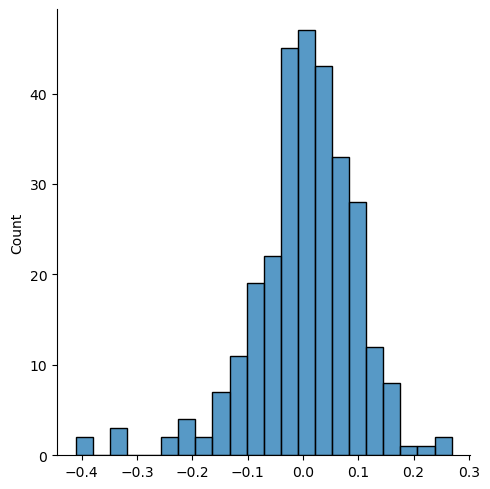

In [70]:
sns.displot(residuals)

In [71]:
# Aaccuracy on testing data
from sklearn.metrics import r2_score

In [72]:
r2_score = r2_score(y_true=y_test_day,y_pred=y_test_predicted)

In [73]:
print("Accuracy ",r2_score)

Accuracy  0.8040839224606575
